**2024.09.01**

---

<span style="color: yellow;">log:</span>

- solve problem: can't saving the plot result. By: apt download ffmpeg
- solve problem: can't play mp4 result video. By: download decoder

**2024.09.02**

---

<span style="color: yellow;">log:</span>
- create remote in macOS VSCode

<span style="color: lightgreen;">TODO:</span>
- get `com` data from celadro data to get the position of cell
- calculate density
- calculate Keff


**2024.09.02**

---

<span style="color: yellow;">log:</span>
- finish extrating `com` data and save it in `cell_posions.csv` file


**2024.09.05**

---

<span style="color: yellow;">log:</span>
- run `shape_bigger` to get system with bigger size
- read “Emergence of Active Nematic Behaviour in Monolayers of Isotropic Cells.” Physical Review Letters 122, no. 4 (February 1, 2019): 048004. https://doi.org/10.1103/PhysRevLett.122.048004.


**2024.09.17 Tue**

---

<span style="color: yellow;">log:</span>
- finish `data_exporter.ipynb` 
    - center of mass as `cell_positions.npy`, format `(frames, cell id, 2-dimensions)`
    - velocity as `cell_velocity.npy` format `(frames, cell id, 2-dimensions)`

- start `myplot.ipynb`
    - plot positons to generate `density_distribution.gif`

**2024.09.18 Wed**

---

<span style="color: yellow;">log:</span>
- work on `myplot.ipynb`
    some good color map:
        - cmap='inferno'
        - cmap='plasma'
- finish plot of positions
    - key:  cmap: plasma
            power norm
            gaussian filter
- start plot of stress
    problem: data format, match the index with real position. could be solved from `plot/plot.py`

**2024.09.20**

---

<span style="color: yellow;">log:</span>

- key: `archive.py`define `frame`. 
    - lx, ly is the size of data sampling point, i.e., there is lx*ly points in the region that save the local data( velocity, stress...).
    

**2024.09.24** rainning is terrible

---

<span style="color: pink;">note:</span>

- velocity field: not on "cell velocity", but the phase velocity: $$ret[i] = \sum_j \phi_j[i] * value_j$$
    - eg: $velocity field = \sum_j \phi_j * V[j]$ 

    - "每一点的field值是所有phase fields的加权平均"

- usage of _get_field in `plot/plot.py`:
    - _get_field(phases, values), both the format is __list__. The phases should be frame.phi, [[phase1],[phase2]...[phasen]]. 

    values should be in the format of [[v1_n],[v2_n]], where v1_n & v2_n both contains n values corresponding n phases.

<span style="color: yellow;">log:</span>

- add new function to `plot/plot.py`
    - density_field
        calculate the density_field by $$density = \sum_j phi_j$$
        this should be used with __large coarse grain size__, as it is quite discrete
    - gradient_field  
    - get_gradient_field(vx, vy)
        calculate __velocity gradient__ 



**2024.09.25**

---

<span style="color: pink;">note:</span>

- calculation of AutoCorrelation:
    - convolution theorem: $$ F(f * g) = F(f)F(g)   $$
    - so: $$F(f(x)*f(-x))=F(f(x))F(f(-x))$$
            $$C(r)=f(x)*f(-x)=F^{-1}(F(f(x))\overline{F(f(x))})$$
    - "函数的autocorrelation等于其傅立叶变换的模平方的逆变换"

- Get a frame from a build archive ar: 

__frame = ar.read_frame(i)__

<span style="color: yellow;">log:</span>

- start function in `plot/plot.py`: autocorrelation():


**2024.10.07**

---

<span style="color: pink;">note:</span>

- for an given loaded archived, ar: ar.Size = (150,150). is the phase space.


<span style="color: yellow;">log:</span>

- finish get function in `/plot/plot.py` : get_density_field(phi, size=50)
- finish plot function in `/scripts/correlations` (in `shape` file, temporarily) : plot_spatial_correlation(tot, err, name)
- finish plot spatial correlation of density, but the error is quite big.
    - spatial correlation is not suitable for density in system of this size.


**2024.10.08**

---

<span style="color: pink;">note:</span>


<span style="color: yellow;">log:</span>

- read "Multicellular density fluctuations in epithelial monolayers"

<span style="color: lightgreen;">TODO:</span>

- use box counting method instead of phase sum to get density, and correlation

**2024.10.09**

---

<span style="color: pink;">note:</span>


<span style="color: yellow;">log:</span>

- finish dynamic structure factor

<span style="color: lightgreen;">TODO:</span>

- fitting the Rayleigh peak and Brillouin peak
- calculate the dispersion relation

**2024.10.11**

---

<span style="color: pink;">note:</span>

- dynamic structure factor: fourier transform in time & space of a dynamic field.
- related to time & space scale, fluctuation, wave velocity pattern

<span style="color: yellow;">log:</span>

- finish calculation of spectrum.

**2024.10.12**

---

<span style="color: pink;">note:</span>


<span style="color: yellow;">log:</span>

- finish calculation of spatiotemporal correlation
- new function in `plot/plot.py`:
    - spatiotemporal_correlation(f_xt)
    - spectrum(f_xt)

    example code is in `test.ipynb` for calculation on divergence.

**2024.10.13**

---

<span style="color: pink;">note:</span>
 
- for a loaded archive oa, `frame = oa.read_frame(i)` get the specific frame

- important quantity in json file: 

    Fpol

    Fnem: { zetaQ*sumQ00[k]*dx + zetaQ*sumQ01[k]*dy, zetaQ*sumQ01[k]*dx - zetaQ*sumQ00[k]*dy };

    Fshape: { zetaS*sumS00[k]*dx + zetaS*sumS01[k]*dy, zetaS*sumS01[k]*dx - zetaS*sumS00[k]*dy };

    Fpressure: { pressure[k]*dx, pressure[k]*dy } force density by gradient of pressure

    stress_xx, stress_xy, stress_yy

<span style="color: yellow;">log:</span>

<span style="color: lightgreen;">TODO:</span>

- active achoring: in the absence of any anchoring energies, the presence of activity alone results in a certain alignment of active particles at the interface.

**2024.10.14**

---

<span style="color: pink;">note:</span>

- stress in system: $$\epsilon = -p\mathbf{I}+\zeta \mathbf{Q}$$
- dynamic of phase field model: TWO contributions:
    - 1. passive force: Free Energy: **in p** $$ F = F_{CH}+F{area}+F{rep}$$
        $$\partial_t \phi_i+\mathbf{v}_i * \nabla \phi_i = -\frac{\delta F}{\delta \phi_i}$$


    - 2. active force: plor driven and nematic driven **in Q**

- shape of `stress_xx`: (150,150)

- in now simulation `/shape`: Polarization parameters are __NOT SET__! Activity ONLY contains shape deformation. So polarization Q = 0, and S is actually Q

<span style="color: yellow;">log:</span>

- finish in `plot/plot.py`
    - get function:

            get_active_stress_field(frame, size)

            get_stress_field(frame, siz)
    
    - plot function:

            stress_xx_field(frame, size, engine, cbar )

            active_stress_field(frame, size, engine, cbar)

<span style="color: lightgreen;">TODO:</span>

- nomalized density to traditional number counting field.

**2024.10.14**

---

<span style="color: pink;">note:</span>

<span style="color: yellow;">log:</span>



<span style="color: lightgreen;">TODO:</span>

- calculate mechanic pressure


**2024.10.14**

---

<span style="color: pink;">note:</span>

<span style="color: yellow;">log:</span>



<span style="color: lightgreen;">TODO:</span>

- calculate mechanic pressure


**2024.10.27**

---

<span style="color: pink;">note:</span>

- in run card `.dat` file. the meaning of parameters:
    - omega: adhesion

- inspiration:

    Increase of Acticity maybe lead to a jamming state

    In what state the fluctuation dispear


<span style="color: yellow;">log:</span>



<span style="color: lightgreen;">TODO:</span>



**2024.10.29**

---

<span style="color: pink;">note:</span>



<span style="color: yellow;">log:</span>

- run `shape_bigger_omega0.002`
- get `iso` plot file
- finish reading "topological defects in biological matter"

<span style="color: lightgreen;">TODO:</span>

- idea: emergent defect leads to heterogeneity in population density. And finally the density and stress will make cells change, then reach system heterogeneity.

- PPT: Two main direction: 
    1. characterize the spatiotemporal fluctuation.
    2. emergent defect leads to heterogeneity in population density. And finally the density and stress will make convert the cells to reach system heterogeneity.


**2024.10.29**

---

<span style="color: pink;">note:</span>



<span style="color: yellow;">log:</span>

- plot defect field and density field in `defect.mp4`

<span style="color: lightgreen;">TODO:</span>

- idea: phase transition of solid, liquid, gas in active matter


**2024.10.29**

---

<span style="color: pink;">note:</span>



<span style="color: yellow;">log:</span>

- new folder `tuned_acticity`, and run activity = 1e-3, 2e-3, 3e-3, 5e-3

- __important__ : read “Correlation lengths in hydrodynamic models of active nematics”


<span style="color: lightgreen;">TODO:</span>

- idea: activity leads to emergent nematics, and nematics leads to heterogeneity.



**2024.11.4**

---

<span style="color: pink;">note:</span>

- pressure inside the cell is very large than outside


<span style="color: yellow;">log:</span>



<span style="color: lightgreen;">TODO:</span>

- idea: ninfo = 200  ntot = 100000, zeta = 1e-3, calculate the Keff.

- idea: the heterogeity: length scale of vorticity and density

- correlation of Keff and isotropic stress

**2024.11.13**

---

<span style="color: pink;">note:</span>
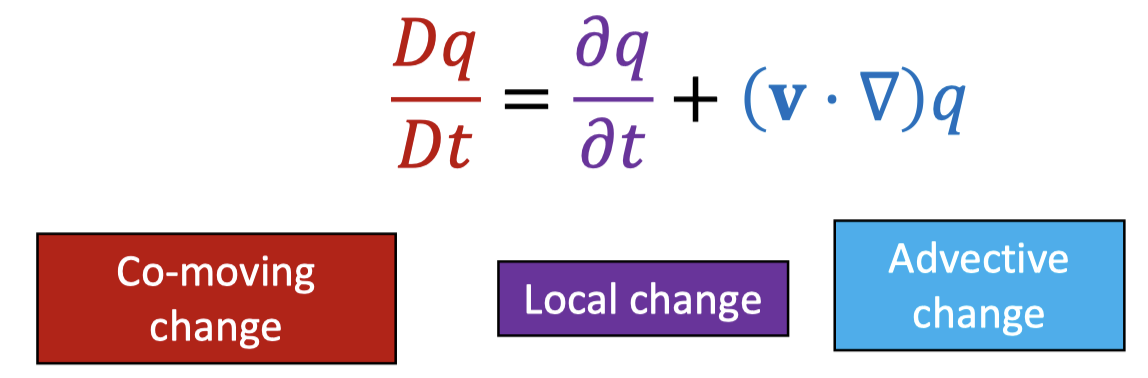

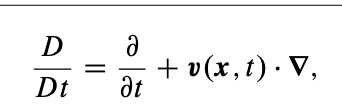

- The hydrodynamics of phase fields is actually:
 $$\frac{D\phi}{Dt}=-\frac{\delta F}{\delta \phi}$$

- thermodynamical consistent: The free energy pf inactive part will strictly decrease.

- current: presusre only contain $F_{rep}$. But it is also thermodynamically consistent.

- Proof of thermodynamical consistency:

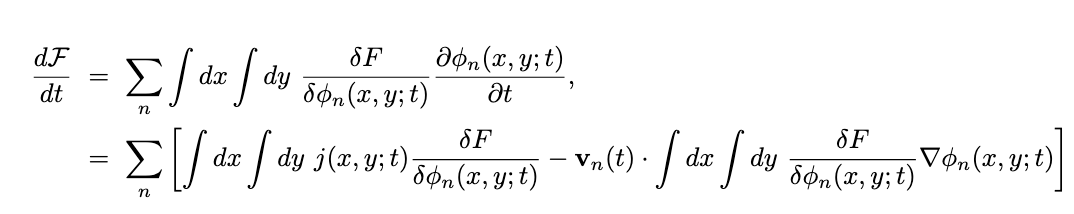

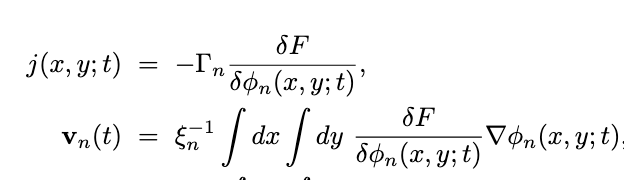

- as long as the definition of V is integration of $\frac{\delta F}{\delta \phi}\nabla \phi$, the free energy is constantly decreasing

<span style="color: yellow;">log:</span>



<span style="color: lightgreen;">TODO:</span>


**2024.11.14**

---

<span style="color: pink;">note:</span>

- phase field model: force density is $$ \frac{\delta \mathcal F}{\delta \phi}\nabla \phi$$

Reason: by definition of total force: 
$$F = \int\int f  = \int\int \frac {\delta \mathcal F}{\delta \phi}\frac{\delta \phi}{\delta r}=\int \int \frac{\delta \mathcal F}{\delta \phi}\nabla \phi$$


<span style="color: yellow;">log:</span>



<span style="color: lightgreen;">TODO:</span>